# Mini-Project: Binary Text Classification with IMDB Dataset (CNN)
____________

Task

1. Preprocess the Data:

    - Load the IMDB dataset using Keras.
    - Convert the sequences of integers into binary matrices using one-hot encoding.
    - Split the data into training, validation, and test sets.
    

2. Build the Model:

    - Create a feedforward neural network with:
        - Two hidden layers using ReLU activation.
        - An output layer with a sigmoid activation for binary classification.
    - Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.
    

3. Train the Model:

    - Train the model on the training data for 20 epochs with a batch size of 512.
    - Use the validation set to monitor performance during training.
    

4. Evaluate the Model:

    - Plot the training and validation loss and accuracy to detect overfitting.
    - Retrain the model with an optimal number of epochs to avoid overfitting.
    - Evaluate the final model on the test set to measure its performance.
    

5. Analyze Results:

    - Compare the training and validation metrics to understand the model’s behavior.
    - Report the final accuracy and loss on the test set.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import tensorflow as tf
import keras
import pandas as pd
import zipfile
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [60]:
with zipfile.ZipFile(r'C:\Users\julie\Downloads\IMDB Dataset.zip') as z:
    with z.open(r'IMDB Dataset.csv') as f:
        df = pd.read_csv(f)

In [61]:
print(df.head())
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})
df.head()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


I need to preprocess the reviews:

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re

def clean_text(text):
    text = re.sub(r'<br />', ' ', text)  # Replace <br /> with space
    text = re.sub(r'<.*?>', '', text)    # Remove HTML tags
    return text

df['review'] = df['review'].apply(clean_text)
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
max_length = 500  
X = pad_sequences(X, maxlen=max_length)

Divide into train, test and validation:

In [66]:
X_train, X_temp, y_train, y_temp = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Now I can create the model:

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.optimizers import RMSprop

In [68]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

Training:

In [69]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
79/79 [==============================] - 27s 325ms/step - loss: 0.6916 - accuracy: 0.5192 - val_loss: 0.7158 - val_accuracy: 0.5126
Epoch 2/20
79/79 [==============================] - 25s 320ms/step - loss: 0.5090 - accuracy: 0.7480 - val_loss: 0.3865 - val_accuracy: 0.8252
Epoch 3/20
79/79 [==============================] - 26s 325ms/step - loss: 0.2632 - accuracy: 0.8945 - val_loss: 0.4362 - val_accuracy: 0.8064
Epoch 4/20
79/79 [==============================] - 26s 324ms/step - loss: 0.1393 - accuracy: 0.9500 - val_loss: 0.3542 - val_accuracy: 0.8532
Epoch 5/20
79/79 [==============================] - 26s 324ms/step - loss: 0.0510 - accuracy: 0.9855 - val_loss: 0.4309 - val_accuracy: 0.8608
Epoch 6/20
79/79 [==============================] - 28s 357ms/step - loss: 0.0161 - accuracy: 0.9967 - val_loss: 0.5333 - val_accuracy: 0.8540
Epoch 7/20
79/79 [==============================] - 27s 344ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.5552 - val_accuracy: 0.8580

The model reached 100% accuracy on the validation set.

In [70]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}" )

157/157 [==============================] - 2s 12ms/step - loss: 1.0113 - accuracy: 0.8556
Test Accuracy: 0.8555999994277954


However, the accuracy when evaluating on the test group is 86%. This indicates some degree of overfitting.

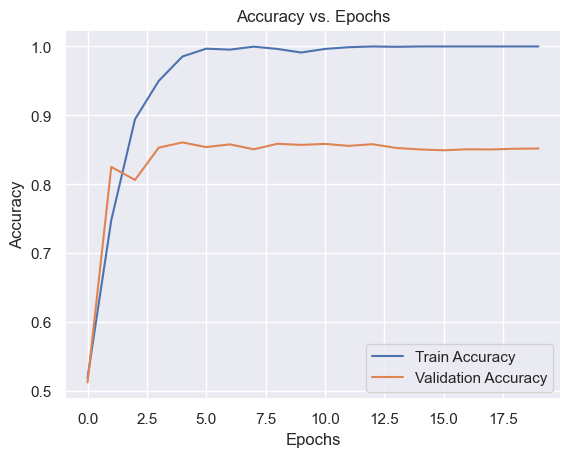

In [76]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

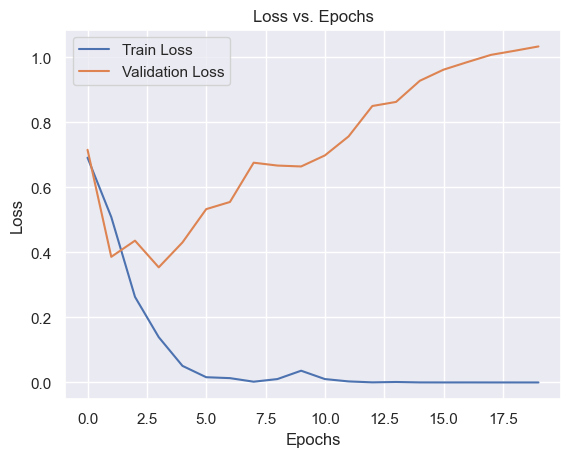

In [79]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We see that there's clear overfitting after around 2 Epochs.

In [80]:
history = model.fit(X_train, y_train, epochs=2, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/2
79/79 [==============================] - 19s 238ms/step - loss: 1.8303e-05 - accuracy: 1.0000 - val_loss: 1.0427 - val_accuracy: 0.8518
Epoch 2/2
79/79 [==============================] - 19s 237ms/step - loss: 2.3946e-05 - accuracy: 1.0000 - val_loss: 1.0488 - val_accuracy: 0.8524


In [81]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

157/157 [==============================] - 1s 8ms/step - loss: 1.0258 - accuracy: 0.8570
Test Loss: 1.0257928371429443
Test Accuracy: 0.8569999933242798


Test Accuracy: 85.7%

Test Loss: 1.03

Now the model is predicting the sentiment fairly well and there's no overfitting.